In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import silhouette_score

In [ ]:
# Load your CSV file into a DataFrame using latin-1 encoding
data_s2 = pd.read_csv("Updated_Season2_with_Polar - Merged_Season.csv", encoding='latin-1')
# data_s3 = pd.read_csv("Updated_Season3.csv", encoding='latin-1')

In [ ]:
data_s2.shape

(3111, 115)

In [ ]:
data_s2.describe()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Sleep.Disturbances,...,Peak Power CoV,Peak Power/BM Mean,Peak Power/BM SD,Peak Power/BM CoV,RSI Mean,RSI SD,RSI CoV,Jump Height Mean,Jump Height SD,Jump Height CoV
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1621.000000,1981.000000,...,224.000000,224.000000,224.000000,212.000000,186.000000,186.000000,198.000000,224.000000,224.000000,212.000000
mean,59.693084,84.065623,59.546189,76.393236,7.780843,6.890545,8.910611,88.865724,14.870450,11.625946,...,4.354464,42.501786,1.004018,2.130660,0.376774,0.017151,5.138889,10.101339,0.417411,2.735377
std,9.003574,36.105314,22.664673,18.553590,1.927197,1.652425,1.117639,6.296796,6.613342,5.605635,...,9.642287,11.196728,1.169620,2.202036,0.077810,0.014885,4.254165,2.730093,1.007866,2.659406
min,39.000000,14.000000,1.000000,10.000000,1.050000,0.820000,1.230000,16.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.100000,0.000000,0.000000,0.000000
25%,53.000000,56.000000,43.000000,64.000000,6.580000,5.870000,8.300000,86.000000,10.000000,8.000000,...,0.800000,41.400000,0.300000,0.700000,0.330000,0.010000,1.600000,9.400000,0.100000,0.975000
50%,58.000000,79.000000,61.000000,78.000000,7.800000,6.950000,8.930000,90.000000,14.000000,11.000000,...,1.600000,43.850000,0.700000,1.500000,0.360000,0.010000,4.100000,10.500000,0.200000,2.100000
75%,65.000000,110.000000,77.000000,92.000000,8.960000,7.930000,9.690000,93.000000,18.000000,14.000000,...,3.200000,46.800000,1.200000,2.600000,0.410000,0.030000,7.900000,11.600000,0.400000,3.725000
max,120.000000,188.000000,99.000000,100.000000,17.130000,12.320000,12.220000,100.000000,56.000000,46.000000,...,52.700000,85.000000,9.000000,12.300000,0.670000,0.090000,28.800000,14.700000,13.100000,18.700000


In [ ]:
# for column in data_s2.columns:
#     print(f"Column '{column}': {data_s2[column].isna().sum()} null values")
# print("Season 3")
# for column in data_s3.columns:
#     print(f"Column {column}': {data_s3[column].isna().sum()} null values")

In [ ]:
# datas2 = data_s2
# datas3 = data_s3
# for column in datas2.columns:
#       if datas2[column].dtype == 'object':
#         datas2.drop(column, axis=1, inplace=True)
# for column in datas3.columns:
#       if datas3[column].dtype == 'object':
#         datas3.drop(column, axis=1, inplace=True)

In [ ]:
# for column in datas2.columns:
#   if datas2[column].isna().sum()>1555 and column!='RSI Mean' and column!='HRV':
#     datas2.drop(column, axis=1, inplace=True)
# for column in datas3.columns:
#   if datas3[column].isna().sum()>916 and column!='RSI.Mean' and column!='HRV':
#     datas3.drop(column, axis=1, inplace=True)

In [ ]:
# imp = IterativeImputer(max_iter=10, random_state=0, estimator=RandomForestRegressor(n_estimators=10, random_state=0))
# imp.fit(datas2)
# datas2=pd.DataFrame(imp.fit_transform(datas2),columns=datas2.columns)
# datas2.to_csv('datas2_1.csv', index=False)

In [ ]:
# imp = IterativeImputer(max_iter=10, random_state=0, estimator=RandomForestRegressor(n_estimators=10, random_state=0))
# imp.fit(datas3)
# datas3=pd.DataFrame(imp.fit_transform(datas3),columns=datas3.columns)
# datas3.to_csv('datas3_1.csv', index=False)

In [ ]:
# data_s2 = pd.read_csv("/content/Updated_Season2.csv", encoding='latin-1')
# data_s3 = pd.read_csv("/content/Updated_Season3.csv", encoding='latin-1')
impDataS2 = pd.read_csv("/content/datas2_1.csv", encoding='latin-1')
# impDataS3 = pd.read_csv("/content/datas3_1.csv", encoding='latin-1')
# impDataS2['Athlete'] = data_s2['Athlete']
# # impDataS2['Date'] = data_s2['Date']
# impDataS3['Athlete'] = data_s3['Athlete']
# # impDataS3['Date'] = data_s3['Date']

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
fig = plt.figure(figsize=(22,22))

# plotting correlation heatmap
dataplot = sb.heatmap(impDataS2.corr().abs(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [ ]:
# averaged_dataS2 = impDataS2.groupby('Athlete').mean().reset_index()
# averaged_dataS3 = impDataS3.groupby('Athlete').mean().reset_index()

In [ ]:
# common_columns = (averaged_dataS2.columns).intersection((averaged_dataS3.columns))

# averaged_dataS2 = averaged_dataS2[common_columns]
# averaged_dataS3 = averaged_dataS3[common_columns]

In [ ]:
# # Merge averaged data from seasons 2 and 3 based on Athlete column
# merged_data = pd.merge(averaged_dataS2, averaged_dataS3, on='Athlete', suffixes=('_S2', '_S3'), how='outer')
# # Iterate over columns to compute the average if athlete is found in both seasons
# for column in common_columns:
#     if column !='Athlete':
#     # Compute average for columns found in both seasons
#       merged_data[column] = merged_data.apply(lambda row: (row[column+'_S2'] + row[column+'_S3']) / 2
#                                             if not pd.isna(row[column+'_S2']) and not pd.isna(row[column+'_S3']) else row[column+'_S2'] if pd.isna(row[column+'_S3']) else row[column+'_S3'], axis=1)
# features = common_columns.tolist()
# features.pop(0)
# # Drop the _S2 and _S3 suffix columns
# merged_data.drop(columns=[column+'_S2' for column in features] + [column+'_S3' for column in features], inplace=True)

# # If athlete is found in both seasons, average their respective column values
# # Otherwise, keep the unique sample as it is
# averaged_data = merged_data


In [ ]:
# averaged_data.to_csv('final.csv', index=False)

In [ ]:
data = pd.read_csv("/content/final.csv")

In [ ]:
newData=data.drop(['Athlete','Unnamed: 0'],axis=1)

In [ ]:
newData

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Sleep.Disturbances,Latency..min.,Cycles,REM.Sleep..hours.,Deep.Sleep..hours.,Light.Sleep..hours.,Awake..hours.,Sleep.Debt..hours.,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,Restorative.Sleep..hours.,RSI Mean
0,51.961749,117.015301,67.609836,77.228415,7.707809,6.985863,8.945667,90.634426,10.279781,2.899071,5.590164,2.172158,1.610027,3.178836,0.743650,1.048486,14.078317,7.266475,3.360295,0.343126
1,57.786339,104.222404,70.719672,75.163934,7.848913,7.078885,9.448508,89.884153,14.418579,2.863087,6.121858,2.369858,1.473951,3.179902,0.802836,1.239913,16.836444,7.110951,3.331967,0.364393
2,58.901813,105.039775,69.870279,78.844018,7.959829,7.239337,9.182161,90.762658,13.418173,2.535643,5.781329,2.144040,1.292546,3.778824,0.750755,1.025742,16.698085,7.308783,3.238806,0.388361
3,54.176503,79.350820,62.496175,85.122951,8.883295,7.457295,8.262656,84.671038,13.942077,6.271831,6.053552,2.109202,1.424404,3.923634,1.437923,0.606716,15.767883,8.094907,3.395383,0.364197
4,58.151913,67.907650,65.246995,64.448634,7.384967,6.309852,9.823770,85.144262,15.866667,2.458683,5.596175,2.024678,1.371825,2.887284,1.065339,1.611984,15.368987,6.365656,3.318951,0.420169
5,60.744671,89.006551,64.288082,83.070356,7.964107,7.343632,8.808835,92.192098,10.977526,2.449810,5.538509,2.386648,1.285593,3.663961,0.637149,0.756457,17.871180,7.376568,3.438473,0.399477
6,52.432710,128.422814,63.272490,85.163217,8.270794,7.555767,8.701345,91.585980,11.942883,1.785598,5.682812,1.801135,1.316200,4.437856,0.726886,0.599035,15.646225,7.607735,3.176224,0.590368
7,60.002474,79.139917,66.924441,89.137679,8.695737,7.877489,8.315534,90.646783,14.159039,2.297761,6.113163,2.574018,1.635551,3.659547,0.829729,0.489263,17.404770,8.237008,3.848392,0.379743
8,55.294536,67.462295,60.648634,68.386885,7.230519,6.554661,9.609421,90.667760,9.438798,3.191705,4.863934,2.141333,1.342240,3.056443,0.689678,1.385262,15.772185,6.622219,3.390295,0.447956
9,58.907104,100.515847,72.136612,78.254098,8.060585,7.241787,9.237142,89.672131,14.420219,2.506891,6.061749,2.243016,1.389590,3.557596,0.842011,0.975459,16.977933,7.242563,3.299623,0.353306


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

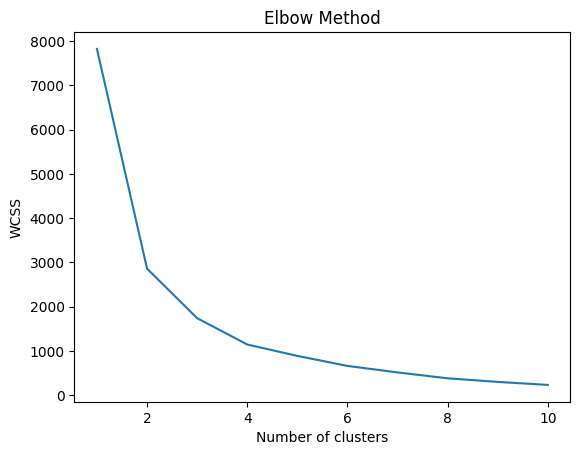

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.49427373142430137


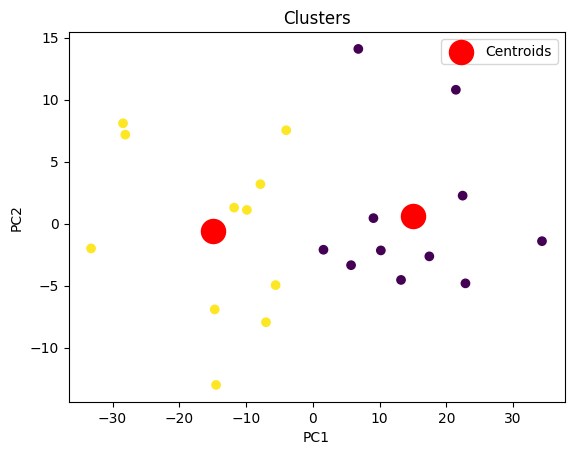

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply PCA
num_components = 2  # Example: Reduce to 2 dimensions
pca = PCA(n_components=num_components)
transformed_data = pca.fit_transform(newData)

# Step 2: Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(transformed_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, select the optimal number of clusters
# In this example, we can visually identify the elbow point, but you can also use automatic methods
optimal_num_clusters = 2  # Example: Choose 3 clusters

# Step 3: Run K-means with the optimal number of clusters and calculate silhouette score
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=0)
kmeans.fit(transformed_data)
labels = kmeans.labels_

silhouette_avg = silhouette_score(transformed_data, labels)
print("Silhouette Score:", silhouette_avg)

# Step 4: Visualization (Optional)
# Visualize the clusters
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will ch

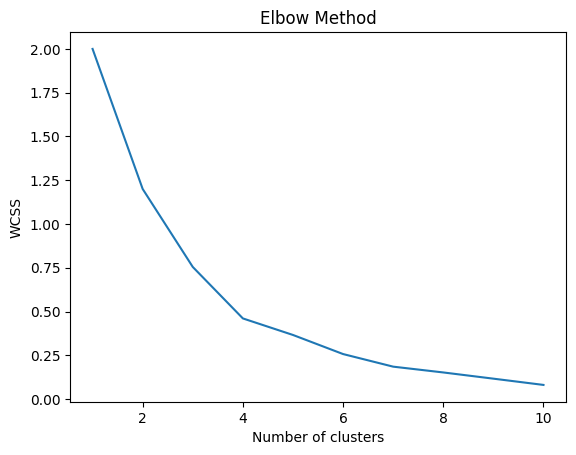

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.49117868290769184


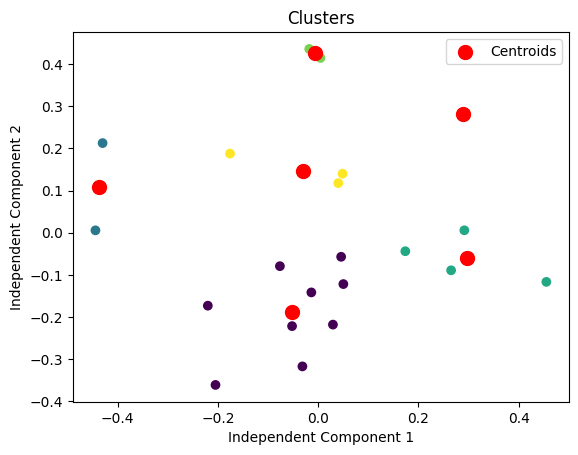

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import FastICA  # Import FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply ICA instead of PCA
num_components = 2  # Example: Reduce to 2 independent components
ica = FastICA(n_components=num_components)  # Initialize FastICA
transformed_data = ica.fit_transform(newData)  # Fit and transform the data

# Step 2: Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(transformed_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, select the optimal number of clusters
# In this example, we can visually identify the elbow point, but you can also use automatic methods
optimal_num_clusters = 6  # Example: Choose 3 clusters

# Step 3: Run K-means with the optimal number of clusters and calculate silhouette score
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=0)
kmeans.fit(transformed_data)
labels = kmeans.labels_

silhouette_avg = silhouette_score(transformed_data, labels)
print("Silhouette Score:", silhouette_avg)

# Step 4: Visualization (Optional)
# Visualize the clusters
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

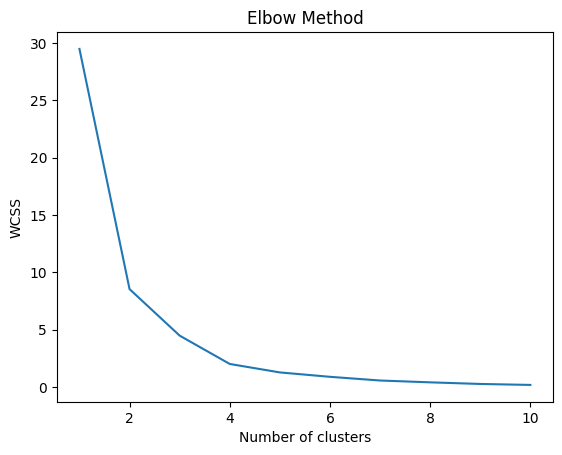

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5681563853757996


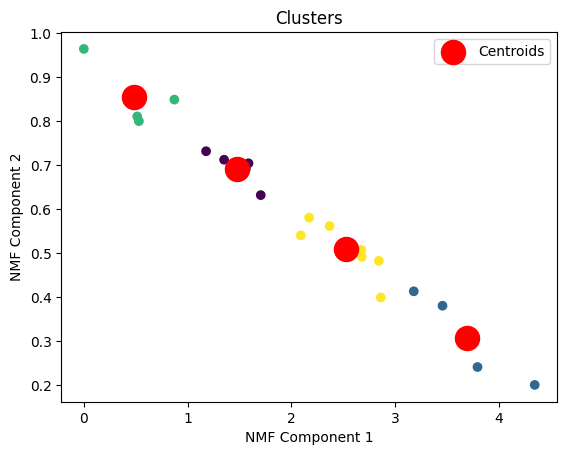

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import NMF  # Import NMF
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply NMF instead of PCA
num_components = 2  # Example: Reduce to 2 components
nmf = NMF(n_components=num_components)  # Initialize NMF
transformed_data = nmf.fit_transform(newData)  # Fit and transform the data

# Step 2: Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(transformed_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, select the optimal number of clusters
# In this example, we can visually identify the elbow point, but you can also use automatic methods
optimal_num_clusters = 4  # Example: Choose 3 clusters

# Step 3: Run K-means with the optimal number of clusters and calculate silhouette score
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=0)
kmeans.fit(transformed_data)
labels = kmeans.labels_

silhouette_avg = silhouette_score(transformed_data, labels)
print("Silhouette Score:", silhouette_avg)

# Step 4: Visualization (Optional)
# Visualize the clusters
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

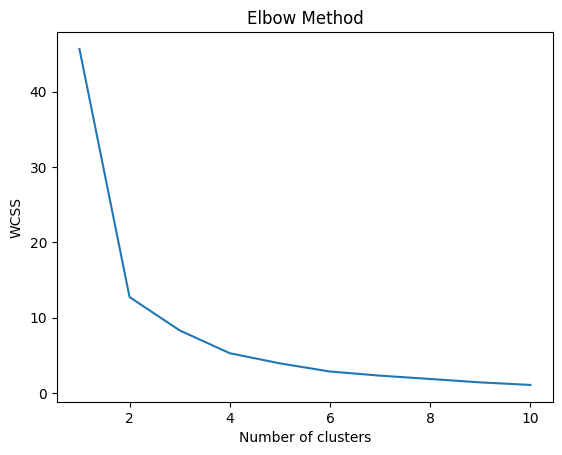

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.51066124


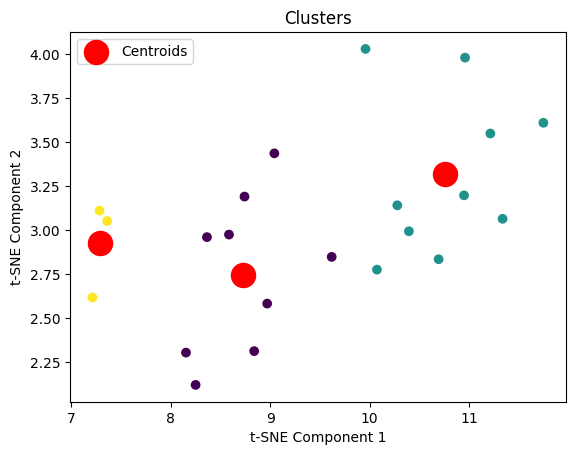

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE  # Import t-SNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply t-SNE with perplexity less than or equal to 15
num_components = 2  # Example: Reduce to 2 components
tsne = TSNE(n_components=num_components, perplexity=15, random_state=0)  # Set perplexity
transformed_data = tsne.fit_transform(newData)  # Fit and transform the data

# Step 2: Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(transformed_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, select the optimal number of clusters
# In this example, we can visually identify the elbow point, but you can also use automatic methods
optimal_num_clusters = 3  # Example: Choose 3 clusters

# Step 3: Run K-means with the optimal number of clusters and calculate silhouette score
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=0)
kmeans.fit(transformed_data)
labels = kmeans.labels_

silhouette_avg = silhouette_score(transformed_data, labels)
print("Silhouette Score:", silhouette_avg)

# Step 4: Visualization (Optional)
# Visualize the clusters
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


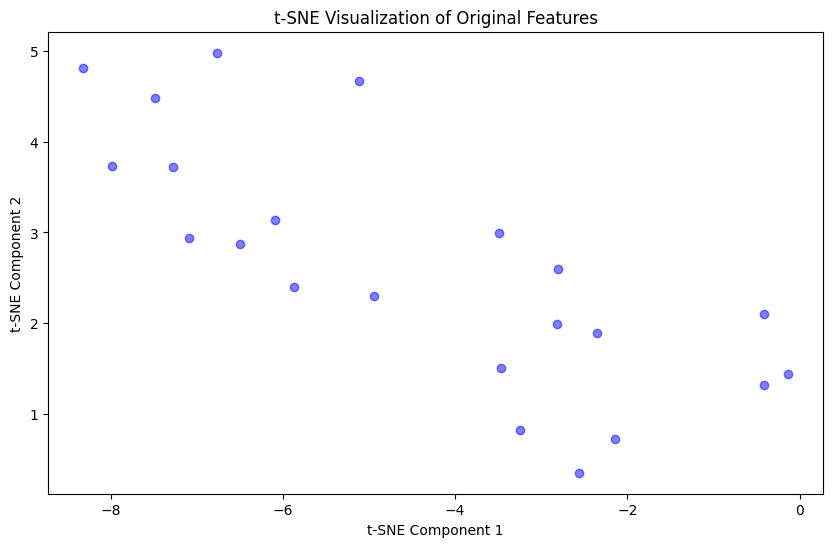

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'data_scaled' contains your preprocessed data with the target column dropped

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity = 10, random_state=0)
transformed_data = tsne.fit_transform(newData)

# Visualize the distribution of original features in the t-SNE space
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='blue', alpha=0.5)
plt.title('t-SNE Visualization of Original Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_tsne = tsne.fit_transform(newData)
tsne.kl_divergence_

0.061366237699985504

In [ ]:
import plotly.express as px
x=X_tsne[:, 0]
y=X_tsne[:, 1]
fig = px.scatter(x,y, color=y)
fig.update_layout(
    title="t-SNE visualization of clustering",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# from keras.layers import Input, Dense
# from keras.models import Model

# # Define the Autoencoder architecture
# input_dim = newData.shape[1]
# encoding_dim = 2  # Example: Reduce to 2 dimensions
# input_layer = Input(shape=(input_dim,))
# encoded = Dense(encoding_dim, activation='relu')(input_layer)
# decoded = Dense(input_dim, activation='sigmoid')(encoded)
# autoencoder = Model(input_layer, decoded)

# # Compile and fit the Autoencoder
# autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.fit(newData, newData,
#                 epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# # Get the encoder part of the Autoencoder
# encoder = Model(input_layer, encoded)
# transformed_data = encoder.predict(newData)

# # Step 2: Elbow method to determine the optimal number of clusters
# wcss = []  # Within-cluster sum of squares

# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(transformed_data)
#     wcss.append(kmeans.inertia_)

# # Plot the elbow method graph
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# # Based on the elbow method, select the optimal number of clusters
# # In this example, we can visually identify the elbow point, but you can also use automatic methods
# optimal_num_clusters = 3  # Example: Choose 3 clusters

# # Step 3: Run K-means with the optimal number of clusters and calculate silhouette score
# kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=0)
# kmeans.fit(transformed_data)
# labels = kmeans.labels_

# silhouette_avg = silhouette_score(transformed_data, labels)
# print("Silhouette Score:", silhouette_avg)

# # Step 4: Visualization (Optional)
# # Visualize the clusters
# plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
# plt.title('Clusters')
# plt.xlabel('Autoencoder Component 1')
# plt.ylabel('Autoencoder Component 2')
# plt.legend()
# plt.show()


In [ ]:
sleep_weights = {'Sleep.Disturbances': 1}
health_weights = {'Awake..hours.':0.55, 'Deep.Sleep..hours.':0.1, 'Sleep.Need':0.05, 'RSI Mean': 0.30}

newData['sleep'] = newData.apply(lambda row: sum(row[feature] * weight for feature, weight in sleep_weights.items()), axis=1)
newData['health'] = newData.apply(lambda row: sum(row[feature] * weight for feature, weight in health_weights.items()), axis=1)

# Display the updated DataFrame
print(newData)

In [ ]:
# newData = newData[['sleep','health']]

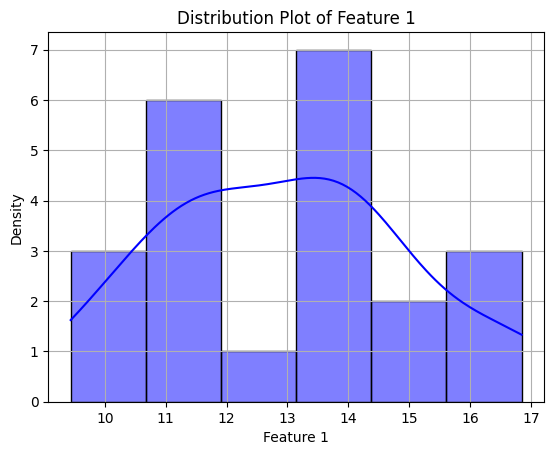

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution plot
sns.histplot(newData['sleep'], kde=True, color='blue')
plt.title('Distribution Plot of Feature 1')
plt.xlabel('Feature 1')
plt.ylabel('Density')
plt.grid(True)
plt.show()

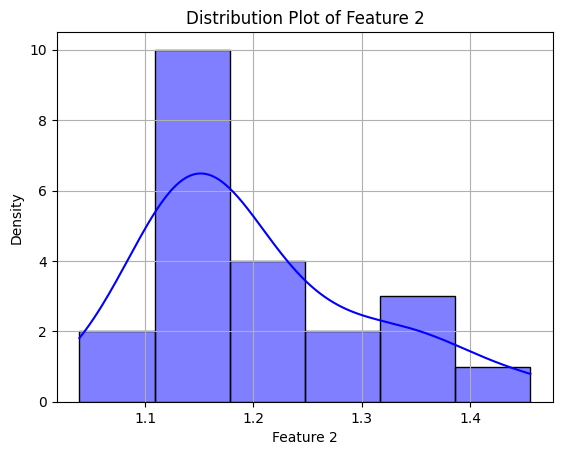

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution plot
sns.histplot(newData['health'], kde=True, color='blue')
plt.title('Distribution Plot of Feature 2')
plt.xlabel('Feature 2')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the subset of data with 'sleep' and 'health' features
data_subset = newData[['sleep', 'health']]

# Initialize an empty list to store the within-cluster sum of squares
wcss = []

# Define the range of clusters to try
num_clusters_range = range(1, 11)

# Calculate the within-cluster sum of squares for different numbers of clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=90)
    kmeans.fit(data_subset)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(num_clusters_range, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



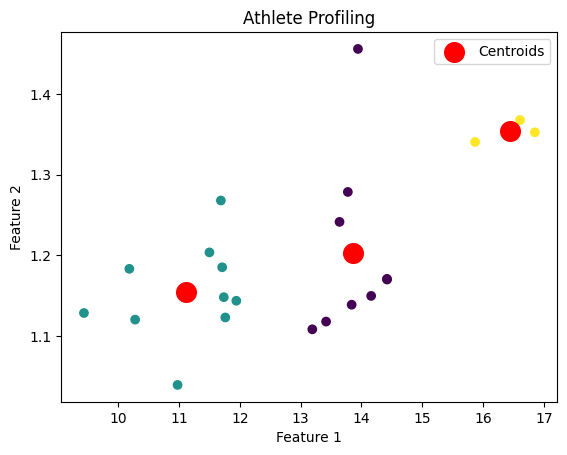

Silhouette Score: 0.7044276368854973


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the subset of data with 'sleep' and 'health' features
data_subset = newData[['sleep', 'health']]

# Initialize KMeans with the desired number of clusters
num_clusters = 3  # Example: Choose 3 clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=90)

# Fit KMeans to the data
kmeans.fit(data_subset)

# Get cluster labels
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(data_subset['sleep'], data_subset['health'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Athlete Profiling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

silhouette_avg = silhouette_score(data_subset, labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score (GMM): 0.7044276368854973
Silhouette Score (Hierarchical): 0.7044276368854973
Silhouette Score (DBSCAN): 0.3882671003422168


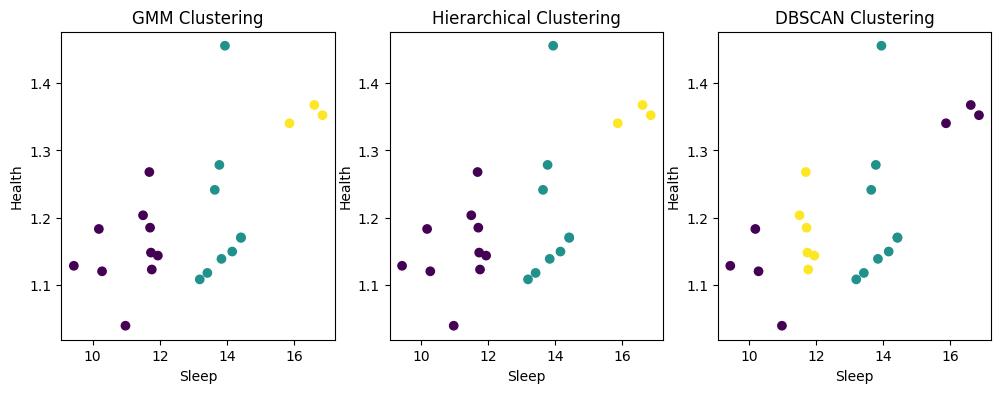

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the subset of data with 'sleep' and 'health' features
data_subset = newData[['sleep', 'health']]

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_subset)
gmm_labels = gmm.predict(data_subset)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(data_subset)
hierarchical_labels = hierarchical.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_subset)

# Silhouette scores
silhouette_gmm = silhouette_score(data_subset, gmm_labels)
silhouette_hierarchical = silhouette_score(data_subset, hierarchical_labels)
silhouette_dbscan = silhouette_score(data_subset, dbscan_labels)

# Print silhouette scores
print("Silhouette Score (GMM):", silhouette_gmm)
print("Silhouette Score (Hierarchical):", silhouette_hierarchical)
print("Silhouette Score (DBSCAN):", silhouette_dbscan)

# Visualize GMM clustering
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(data_subset['sleep'], data_subset['health'], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Sleep')
plt.ylabel('Health')

# Visualize Hierarchical clustering
plt.subplot(1, 3, 2)
plt.scatter(data_subset['sleep'], data_subset['health'], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Sleep')
plt.ylabel('Health')

# Visualize DBSCAN clustering
plt.subplot(1, 3, 3)
plt.scatter(data_subset['sleep'], data_subset['health'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Sleep')
plt.ylabel('Health')

plt.show()


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Define the subset of data with 'sleep' and 'health' features
data_subset = newData[['sleep', 'health']]

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
gmm = GaussianMixture(n_components=3, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit clustering algorithms to the data and get cluster labels
kmeans_labels = kmeans.fit_predict(data_subset)
gmm_labels = gmm.fit_predict(data_subset)
hierarchical_labels = hierarchical.fit_predict(data_subset)
dbscan_labels = dbscan.fit_predict(data_subset)

# Combine cluster labels using a simple strategy (e.g., mode)
combined_labels = np.array([max(set(pair), key=list(pair).count) for pair in zip(kmeans_labels, gmm_labels, hierarchical_labels, dbscan_labels)])

# Calculate silhouette score for the combined clustering
silhouette_avg = silhouette_score(data_subset, combined_labels)
print("Silhouette Score (Ensemble Clustering):", silhouette_avg)


Silhouette Score (Ensemble Clustering): 0.7044276368854973


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assuming 'data_subset' contains your data
# Assuming 'combined_labels' contains the cluster labels obtained from your clustering algorithm

db_index = davies_bouldin_score(data_subset, combined_labels)
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.3595385997130987


In [ ]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=6d5221290c75c62407842349ec7aff3b88b7177c15e94854589d9daefe620f2a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular
import numpy as np

# Assuming newData is a DataFrame containing your data

# Convert DataFrame to numpy array
data_array = newData.values

# Extract feature names
feature_names = newData.columns.tolist()

# Instantiating the explainer object
explainer_lime = lime_tabular.LimeTabularExplainer(data_array,
                                                   feature_names=feature_names,
                                                   verbose=True,
                                                   mode='regression')


In [ ]:
# Index corresponding to the test vector
i = 10

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('reg' in this case)
#    3) the top features which we want to see, denoted by k

exp_lime = explainer_lime.explain_instance(
    data_array[i], reg.predict, num_features=k)

# Finally visualizing the explanations
exp_lime.show_in_notebook()